In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
df=pd.read_csv('/config/workspace/dataset/diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.

In [11]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column

df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['Glucose'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,121.681605,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,30.436016,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,44.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,99.750000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,117.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,140.250000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,199.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.lets visualize it
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

<Axes: >

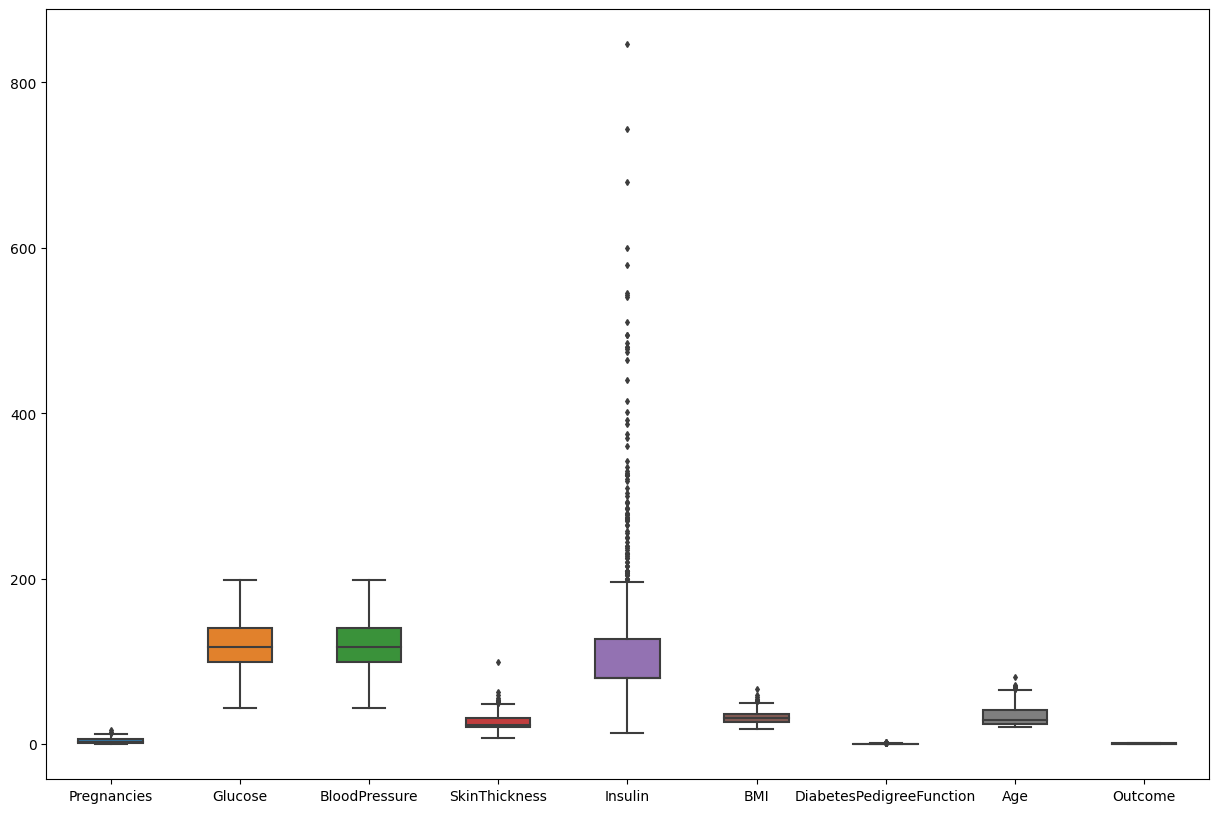

In [14]:
#now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.lets visualize it
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,148.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,85.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,183.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,89.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,137.0,35.000000,168.000000,43.1,2.288,33,1


In [16]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [17]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,148.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,85.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,183.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,89.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,137.0,35.000000,168.000000,43.1,2.288,33


In [18]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [19]:
# split the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [21]:
import pickle 
def scaler_standard(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)

    #Saving the model
    file=open('/config/workspace/model/standardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled,X_test_scaled

In [22]:
X_train_scaled,X_test_scaled=scaler_standard(X_train,X_test)

In [23]:
X_train_scaled

array([[ 0.90832902,  0.93644016,  0.93644016, ...,  0.36864973,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.81628595, -0.81628595, ..., -0.63292879,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.43249471,  1.43249471, ...,  2.81536295,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.91549686, -0.91549686, ..., -1.13371805,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.2131296 , -1.2131296 , ..., -0.36107176,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.4734559 ,  0.4734559 , ..., -0.09027668,
         0.52121586,  2.94889395]])

In [24]:
X_test_scaled

array([[-0.8354355 ,  2.55688505,  2.55688505, ...,  1.47038609,
         2.78594417, -0.96569189],
       [-0.54480808, -0.48558291, -0.48558291, ...,  0.13971749,
        -0.1876381 , -0.88240283],
       [ 0.03644676, -1.51076233, -1.51076233, ...,  0.19695055,
        -0.22668514, -0.71582471],
       ...,
       [ 0.03644676,  0.67187772,  0.67187772, ...,  1.627777  ,
         0.53623395, -0.96569189],
       [-0.25418066, -0.18795018, -0.18795018, ..., -0.90478581,
        -1.07971278, -0.79911377],
       [-0.8354355 , -0.48558291, -0.48558291, ..., -0.26091391,
         1.06487079, -0.79911377]])

In [25]:
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [26]:
## Hyperparameter Tuning
## GridSearch CV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}


In [27]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [28]:
clf.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

In [29]:
clf.best_score_

0.7654151242728714

In [30]:
y_pred = clf.predict(X_test_scaled)

In [38]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [39]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7532467532467533

In [41]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8037383177570093

In [42]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8349514563106796

In [43]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.819047619047619

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

In [35]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[86, 21],
       [17, 30]])

In [40]:
accuracy_score(y_test,y_pred)

0.7532467532467533

In [37]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.5882352941176471
Recall = 0.6382978723404256
F1 Score = 0.6122448979591838


In [44]:
import pickle
file = open('/config/workspace/model/modelForPrediction.pkl','wb')
pickle.dump(log_reg,file)
file.close()